In [2]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin';os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
import pylab
import calendar
from scipy import stats
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import  preprocessing, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, log_loss


C:\Users\VikasDesktop\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
pd.set_option('display.max_colwidth', -1)

In [64]:
#train_df = pd.read_json("E:/GA_TECH_DataMining/project/train.json")
#type(train_df)
train_df1 = pd.read_json("E:/GA_TECH_DataMining/project/train.json")

#train_df = train_df1[train_df1.interest_code.notnull()]
#train_df.head()
#train_df.features.head(10)
#df = train_df.features.to_frame
#type(df)
#train_df.features.index

In [144]:
train_df1.head()
#train_df1.shape

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a website_redacted,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renthop.com/2/7211212_7dfc41dced69245065df83d08eed4a00.jpg, https://photos.renthop.com/2/7211212_c17853c4b869af6f53af08b0f5820b4c.jpg, https://photos.renthop.com/2/7211212_787ad8ea0c089792e7453e2121f8ac89.jpg, https://photos.renthop.com/2/7211212_2e88b0d293ee333c804c2f00536eee49.jpg]",3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renthop.com/2/7150865_655f861a1d5da70050010611016ae2ad.jpg, https://photos.renthop.com/2/7150865_5b8cc459f3abd38bc81cbf329dab3220.jpg, https://photos.renthop.com/2/7150865_2f59c34ca4ea98c26d559109a467ef84.jpg, https://photos.renthop.com/2/7150865_2258d2eb5b5fb4bc0eb6534929cdee15.jpg, https://photos.renthop.com/2/7150865_af28a5075bd321e694791645423dcdde.jpg, https://photos.renthop.com/2/7150865_714a3d63488162ebe4a22896dd5138f7.jpg, https://photos.renthop.com/2/7150865_8dda0ecbe4c6015d3e8dffe16808aa0b.jpg, https://photos.renthop.com/2/7150865_c4aabf346e295afda87d13c16f6f5659.jpg, https://photos.renthop.com/2/7150865_2de68908ea943dd96c925490c7f98297.jpg, https://photos.renthop.com/2/7150865_fc18c2e84683b567c9568ed7597f1ba8.jpg]",5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 trains. Surrounded by many local cafe?s, restaurants, available for November 1st move in!<br/><br/>To view this apartment or any other please contact me via email or call at the number listed.<br/><br/><br/><br/><br/><br/>Bond New York is a real estate broker that supports equal housing opportunity.<p><a website_redacted",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renthop.com/2/6887163_b9cf6db6df611bc53f75be3214a43807.jpg, https://photos.renthop.com/2/6887163_cd3f2246cfd25691f33ed12b251d0230.jpg, https://photos.renthop.com/2/6887163_54c402cf0d681f6ea4796b9d177786bb.jpg, https://photos.renthop.com/2/6887163_7745da2a3693fe627154794ab0ebca29.jpg, https://photos.renthop.com/2/6887163_95c93e4af27182f8ac55c749fc74a041.jpg, https://photos.renthop.com/2/6887163_4b50a743b760e23b8d6f6f586a704da7.jpg, https://photos.renthop.com/2/6887163_6133523d6d5a0fba36bb25e3616848c8.jpg]",2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,"Building Amenities - Garage 

In [175]:

#train_df1["Doorman"] = train_df1["features"].apply(lambda x: 1 if "Doorman" in x[1] else 0)
#train_df1[["features","Doorman"]]


In [66]:

train_df1.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [4]:
test_df1 = pd.read_json("E:/GA_TECH_DataMining/project/test.json")

In [138]:
test_df1.shape

(74659, 14)

In [179]:
#test_df1.manager_id.value_counts()

In [224]:
combinedDF =train_df1.append(test_df1)

#combinedDF.features.head(350)

In [225]:
combinedDF['num_features'] = combinedDF['features'].apply(lambda x : len(x))
combinedDF['dec_len'] = combinedDF['description'].apply(lambda x : len(x))
combinedDF['num_photos'] = combinedDF['photos'].apply(lambda x : len(x))
combinedDF['num_words'] = combinedDF['photos'].apply(lambda x : len(x))
combinedDF[['features','num_features', 'num_photos', 'photos']]
combinedDF["Doorman"] = combinedDF["features"].apply(lambda x: 1 if "Doorman" in x else 0)
combinedDF["Dogs_Allowed"] = combinedDF["features"].apply(lambda x: 1 if "Dogs Allowed" in x else 0)
combinedDF["Cats_Allowed"] = combinedDF["features"].apply(lambda x: 1 if "Cats Allowed" in x else 0)
combinedDF["Pets_Allowed"] = combinedDF["features"].apply(lambda x: 1 if "Pets Allowed Case by Case" in x else 0)
combinedDF["Elevator"] = combinedDF["features"].apply(lambda x: 1 if "Elevator" in x else 0)
combinedDF["Balcony"] = combinedDF["features"].apply(lambda x: 1 if "Balcony" in x else 0)
combinedDF["Hardwood"] = combinedDF["features"].apply(lambda x: 1 if "Hardwood Floors" in x else 0)
combinedDF["Internet_Mention"] = combinedDF["features"].apply(lambda x: 1 if "High Speed Internet" in x else 0)
combinedDF["Loft"] = combinedDF["features"].apply(lambda x: 1 if "Loft" in x else 0)
combinedDF["Outdoors"] = combinedDF["features"].apply(lambda x: 1 if "Outdoor Space" in x else 0)
combinedDF["New"] = combinedDF["features"].apply(lambda x: 1 if "New Construction" in x else 0)
combinedDF["No_fee"] = combinedDF["features"].apply(lambda x: 1 if " No Fee" in x else 0)
combinedDF["Gym"] = combinedDF["features"].apply(lambda x: 1 if "Fitness Center" in x else 0)
combinedDF["Parking"] = combinedDF["features"].apply(lambda x: 1 if "Parking" in x else 0)
combinedDF["Storage"] = combinedDF["features"].apply(lambda x: 1 if "Storage" in x else 0)
combinedDF["Sunlight"] = combinedDF["features"].apply(lambda x: 1 if "Skylight" in x else 0)
combinedDF["Pool"] = combinedDF["features"].apply(lambda x: 1 if "Swimming Pool" in x else 0)
combinedDF["Laundry_Room"] = combinedDF["features"].apply(lambda x: 1 if "Laundry In Building" in x else 0)
combinedDF["Wash_Dry"] = combinedDF["features"].apply(lambda x: 1 if "Washer/Dryer" in x else 0)
combinedDF["Dishwasher"] = combinedDF["features"].apply(lambda x: 1 if "Dishwasher" in x else 0)
combinedDF["Prewar"] = combinedDF["features"].apply(lambda x: 1 if "Pre-War" in x else 0)
combinedDF["AirCon"] = combinedDF["features"].apply(lambda x: 1 if "Air Conditioning" in x else 0)

In [226]:
train_df = combinedDF[combinedDF.interest_level.notnull()]
test_df = combinedDF[combinedDF.interest_level.isnull()]
test_df.head()

,Doorman,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,...,Gym,Parking,Storage,Sunlight,Pool,Laundry_Room,Wash_Dry,Dishwasher,Prewar,AirCon
0,0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",NaN,40.7185,...,0,0,0,0,0,0,0,1,0,0
1,0,1.0,2,0,2016-06-24 06:36:34,"Prime Soho - between Bleecker and Houston - Newly renovated, with stainless steel appliances, hardwood floors, marble bath. Convenient to world class restaurants, shopping, galleries. Subway C,E,B,D,F,M. To schedule a viewing call Andrew today.",Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",NaN,40.7278,...,0,0,0,0,0,0,0,0,1,0
100,1,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,"New York chic has reached a new level at 101 East 10th Street. Located on a prime corner in the East Village, steps from Union Square and Greenwich Village, it is sure to up the ante for coveted living spaces. 101 East 10th Street offers bespoke finishes, stainless appliances, marble bathrooms, ample closet space, and incredible natural light resulting in a rare genre of urban living.<br /><br />**Landlord is Offering 1 Month Free (12 month lease) - Advertised Rent is the Net Effective** <br /><br />Apartment Features:<br />• Built in A/C<br />• Brand New Renovations<br />• In Unit Laundry<br />• Stainless Steel Appliances<br />• Dishwasher<br />• Marble Bathrooms<br />• Oak Wood Flooring<br /> <br />Building Features:<br />• Part-time Doorman<br />• Virtual Doorman<br />• Brand New Common Area Renovations<br />• Renovated Hallways<br />• Elevator<br />• Unbeatable Union Square Location<br />• Steps to Whole Foods, Trader Joes & Westside Market<br /> <br />Contact leasing to schedule a viewing: kagglemanager@renthop.com",101 East 10th Street,"[Doorman, Elevator, No Fee]",NaN,40.7306,...,0,0,0,0,0,0,0,0,0,0
1000,0,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,"Step into this fantastic new Construction in the heart of Williamsburg. This modern brand new apartment is the ultimate expression of modern living. The apartment boasts floor to ceiling windows, eco friendly bamboo flooring flowing from wall to wall and a video intercom. Considerable thought has gone into the kitchen design and details. White lacquer and frosted glass cabinetry and white quartz countertops provide a bright setting for storing and slicing, while a stainless steel appliance package including a wine chiller enhances serving dinner for two or hosting a larger crowd. Bathroom features white glass and grey ceramic tiles, a white custom oak vanity ,an over-sized soaking tub and separate, glass-enclosed steam shower, The apartment also has it's own storage space in the building and a private balcony! The building features a warm common back garden, a serene rooftop deck with views over the surrounding tree lined streetsYour new apartment is just steps away from everything that makes Williamsburg unique: emerging-designer boutiques, bars and chef-run restaurants. The city is just minutes away by L train at Bedford Avenue or Lorimer Street stops. Contact me today to set up your exclusive viewing at kagglemanager@renthop.com or 966-636-7822<br /><br /><br /><br /><br /><br /><p><a website_redacted",South Third Street\r,"[Roof Deck, Balcony, Elevator, L

In [227]:
test_df = test_df.drop('interest_level',axis=1)


In [228]:
train_df.shape

test_df.columns


Index([         u'Doorman',        u'bathrooms',         u'bedrooms',
            u'building_id',          u'created',      u'description',
        u'display_address',         u'features',         u'latitude',
             u'listing_id',        u'longitude',       u'manager_id',
                 u'photos',            u'price',   u'street_address',
           u'num_features',          u'dec_len',       u'num_photos',
              u'num_words',     u'Dogs_Allowed',     u'Cats_Allowed',
           u'Pets_Allowed',         u'Elevator',          u'Balcony',
               u'Hardwood', u'Internet_Mention',             u'Loft',
               u'Outdoors',              u'New',           u'No_fee',
                    u'Gym',          u'Parking',          u'Storage',
               u'Sunlight',             u'Pool',     u'Laundry_Room',
               u'Wash_Dry',       u'Dishwasher',           u'Prewar',
                 u'AirCon'],
      dtype='object')

In [238]:

#X = train_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','Doorman','Dogs_Allowed','Cats_Allowed','Pets_Allowed','Elevator','Balcony','Hardwood','Internet_Mention','Loft','Outdoors','New','No_fee','Gym','Parking','Storage','Sunlight','Pool','Laundry_Room','Wash_Dry','Dishwasher','Prewar','AirCon']]
X = train_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','dec_len','Pets_Allowed','Hardwood','No_fee','Parking','Storage','Sunlight','Laundry_Room','Wash_Dry','Prewar','AirCon']]
X.index = train_df['listing_id']

#from sklearn.preprocessing import LabelBinarizer
#X.head()
#encoder = LabelBinarizer()
#train_y = encoder.fit_transform(y)
#train_y = transformed_y.transform(y)
target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))
X.head()
#y.head()
#train_y

,bathrooms,bedrooms,longitude,latitude,price,num_features,num_photos,dec_len,Pets_Allowed,Hardwood,No_fee,Parking,Storage,Sunlight,Laundry_Room,Wash_Dry,Prewar,AirCon
listing_id,,,,,,,,,,,,,,,,,,
7211212,1.5,3,-73.9425,40.7145,3000,0,5,588,0,0,0,0,0,0,0,0,0,0
7150865,1.0,2,-73.9667,40.7947,5465,5,11,8,0,0,0,0,0,0,0,0,0,0
6887163,1.0,1,-74.0018,40.7388,2850,4,8,691,1,1,0,0,0,0,1,0,0,0
6888711,1.0,1,-73.9677,40.7539,3275,2,3,492,0,1,0,0,0,0,0,0,0,0
6934781,1.0,4,-73.9493,40.8241,3350,1,3,479,0,0,0,0,0,0,0,0,1,0


In [240]:
Xtest = test_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','dec_len','Pets_Allowed','Hardwood','No_fee','Parking','Storage','Sunlight','Laundry_Room','Wash_Dry','Prewar','AirCon']]
Xtest.index = test_df['listing_id']
Xtest.head()

,bathrooms,bedrooms,longitude,latitude,price,num_features,num_photos,dec_len,Pets_Allowed,Hardwood,No_fee,Parking,Storage,Sunlight,Laundry_Room,Wash_Dry,Prewar,AirCon
listing_id,,,,,,,,,,,,,,,,,,
7142618,1.0,1,-73.9865,40.7185,2950,6,8,587,0,1,0,0,0,0,0,0,0,0
7210040,1.0,2,-74.0000,40.7278,2850,3,3,245,0,0,0,0,0,0,0,0,1,0
7103890,1.0,1,-73.9890,40.7306,3758,3,6,1211,0,0,0,0,0,0,0,0,0,0
7143442,1.0,2,-73.9571,40.7109,3300,10,6,1327,0,1,0,0,0,0,0,0,0,0
6860601,2.0,2,-73.9845,40.7650,4900,14,7,1162,0,1,0,0,0,0,1,0,1,0


In [99]:

#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#n_estimators = [100, 200]
#learning_rate =0.1
#max_depth=5
#min_child_weight=1, 
#gamma=0, 
#subsample=0.8, 
#colsample_bytree=0.8,
#objective= 'binary:logistic', 
#nthread=4, 
#scale_pos_weight=1, 
#seed=27)
#param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              #'n_estimators' : [500, 1000, 1500]}
param_grid = {'max_depth': [3,5,7]}
            # 'min_child_weight' : [1,3,5]
  #           }
#param_grid = {'max_depth': [2,3,5]}
    

param_fixed = { 'objective' : 'multi:softprob'
              }


In [92]:
model = XGBClassifier(objective='multi:softprob',nthread=10, seed=27, learning_rate=0.01,max_delta_step = 1,n_estimators=500)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, scoring="neg_log_loss", cv=10)
grid_result = grid_search.fit(X, train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
grid_result.return_train_score
# plot
#plt.errorbar(learning_rate, means, yerr=stds)
#plt.title("XGBoost learning_rate vs Log Loss")
#plt.xlabel('learning_rate')
#plt.ylabel('Log Loss')

Best: -0.612141 using {'n_estimators': 500, 'learning_rate': 0.3}
-1.073606 (0.000092) with: {'n_estimators': 500, 'learning_rate': 0.0001}
-1.050155 (0.000199) with: {'n_estimators': 1000, 'learning_rate': 0.0001}
-1.028122 (0.000297) with: {'n_estimators': 1500, 'learning_rate': 0.0001}
-0.910731 (0.001014) with: {'n_estimators': 500, 'learning_rate': 0.001}
-0.814589 (0.001866) with: {'n_estimators': 1000, 'learning_rate': 0.001}
-0.762682 (0.002457) with: {'n_estimators': 1500, 'learning_rate': 0.001}
-0.675147 (0.003956) with: {'n_estimators': 500, 'learning_rate': 0.01}
-0.649905 (0.004531) with: {'n_estimators': 1000, 'learning_rate': 0.01}
-0.638242 (0.004585) with: {'n_estimators': 1500, 'learning_rate': 0.01}
-0.617100 (0.005052) with: {'n_estimators': 500, 'learning_rate': 0.1}
-0.612318 (0.005507) with: {'n_estimators': 1000, 'learning_rate': 0.1}
-0.612287 (0.005980) with: {'n_estimators': 1500, 'learning_rate': 0.1}
-0.612174 (0.005659) with: {'n_estimators': 500, 'learni

True

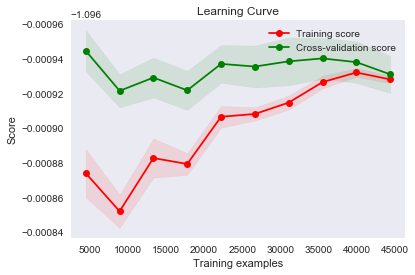

In [273]:
estimator = XGBClassifier(objective='multi:softprob',learning_rate= 0.01,seed=27,n_estimators=30)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, train_y, cv=cv, scoring="neg_log_loss", n_jobs=-1, train_sizes=np.linspace(.1,1., 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [128]:
#train_y.max()
#train_y1 = np.array(train_y,dtype=int)
#train_y1
X


,bathrooms,bedrooms,longitude,latitude,price,num_features,num_photos
listing_id,,,,,,,
7211212,1.5,3,-73.9425,40.7145,3000,0,5
7150865,1.0,2,-73.9667,40.7947,5465,5,11
6887163,1.0,1,-74.0018,40.7388,2850,4,8
6888711,1.0,1,-73.9677,40.7539,3275,2,3
6934781,1.0,4,-73.9493,40.8241,3350,1,3
6894514,2.0,4,-74.0028,40.7429,7995,0,5
6930771,1.0,2,-73.9660,40.8012,3600,8,10
6867392,2.0,1,-73.9957,40.7427,5645,8,5
6898799,1.0,1,-73.9457,40.8234,1725,4,5


In [241]:
dtrain = xgb.DMatrix(data=X, label=train_y)
#params = {'max_depth':5, 'eta':0.3,  'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3}
params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':'0.01','max_depth':'3','max_delta_step':'1',
            'min_child_weight':1}
num_round = 100
print ('running cross validation')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
xcv =xgb.cv(params,dtrain, num_boost_round=1000,seed = 7,folds=10, early_stopping_rounds=3)
xcv

#xgb.train(params,dtrain)
#dtrain.feature_names

running cross validation


,test-mlogloss-mean,test-mlogloss-std,train-mlogloss-mean,train-mlogloss-std
0,1.093462,0.000057,1.093448,0.000047
1,1.088374,0.000116,1.088346,0.000095
2,1.083341,0.000174,1.083299,0.000142
3,1.078402,0.000185,1.078348,0.000142
4,1.073484,0.000244,1.073416,0.000191
5,1.068647,0.000250,1.068565,0.000189
6,1.063835,0.000307,1.063741,0.000235
7,1.059109,0.000316,1.059001,0.000236
8,1.054413,0.000360,1.054290,0.000270
9,1.049795,0.000372,1.049662,0.000275


In [242]:
#xgb.plot_importance(xcv)
#pyplot.show()
train_params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':0.01,'max_depth':'3','max_delta_step':'1','early_stopping_rounds':'3'}
final_gb = xgb.train(train_params,dtrain,num_boost_round=1000)


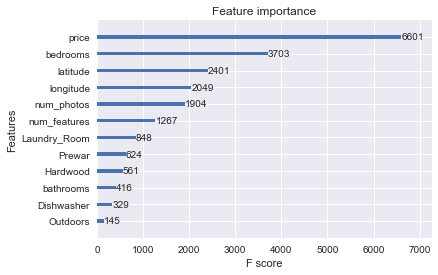

In [206]:
xgb.plot_importance(final_gb)

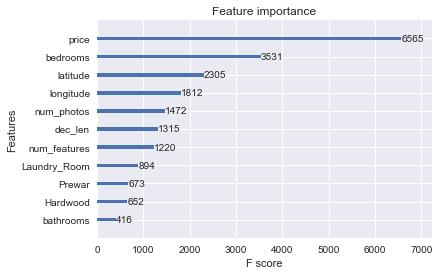

In [233]:
xgb.plot_importance(final_gb)

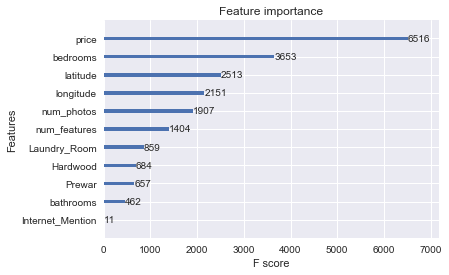

In [212]:
xgb.plot_importance(final_gb)

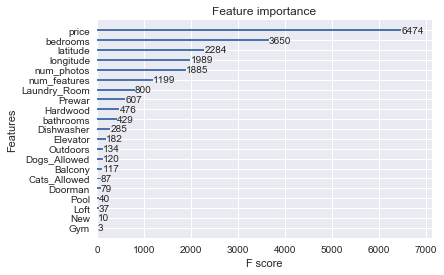

In [201]:
xgb.plot_importance(final_gb)

In [ ]:
estimator = XGBClassifier(objective='multi:softprob',learning_rate= 0.0001,seed=27,n_estimators=30)

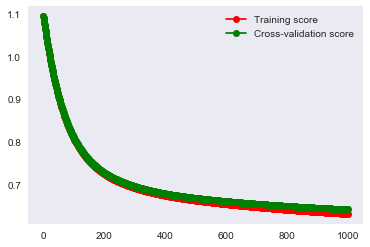

In [234]:
#plt.gca().invert_yaxis()
plt.grid()

#plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
 #                train_scores_mean + train_scores_std, alpha=0.1,
  #               color="r")
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 #test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(xcv.index, xcv['train-mlogloss-mean'], 'o-', color="r",
         label="Training score")
plt.plot(xcv.index, xcv['test-mlogloss-mean'], 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [236]:
Xtest

,bathrooms,bedrooms,longitude,latitude,price,num_features,num_photos,dec_len,Pets_Allowed,Hardwood,No_fee,Parking,Storage,Sunlight,Laundry_Room,Wash_Dry,Prewar,AirCon
listing_id,,,,,,,,,,,,,,,,,,
7142618,1.0,1,-73.9865,40.7185,2950,6,8,587,0,1,0,0,0,0,0,0,0,0
7210040,1.0,2,-74.0000,40.7278,2850,3,3,245,0,0,0,0,0,0,0,0,1,0
7103890,1.0,1,-73.9890,40.7306,3758,3,6,1211,0,0,0,0,0,0,0,0,0,0
7143442,1.0,2,-73.9571,40.7109,3300,10,6,1327,0,1,0,0,0,0,0,0,0,0
6860601,2.0,2,-73.9845,40.7650,4900,14,7,1162,0,1,0,0,0,0,1,0,1,0
6840081,3.0,3,-73.9774,40.7901,9000,11,8,563,0,1,0,0,0,0,0,0,0,0
6922337,1.0,2,-73.9571,40.7730,2800,2,8,660,0,1,0,0,0,0,0,0,0,0
6913616,1.0,0,-73.9511,40.6751,1900,5,5,399,0,1,0,0,0,0,0,0,1,0
6937820,1.0,2,-73.9929,40.7597,3000,2,3,308,0,0,0,0,0,0,0,0,0,0


In [243]:
preds1 = final_gb.predict(xgb.DMatrix(data=Xtest))

In [245]:
#preds = grid_result.predict_proba(Xtest)
#preds = final_gb.predict(Xtest)
#xcv.predict_proba
predsf = pd.DataFrame(preds1)
cols = ['high', 'medium', 'low']
predsf.columns = cols
predsf['listing_id'] = Xtest.index

predsf.to_csv('E:/rentalProject/submission.csv', index=None)
predsf

,high,medium,low,listing_id
0,0.059432,0.352989,0.587579,7142618
1,0.121529,0.231876,0.646594,7210040
2,0.017723,0.074999,0.907279,7103890
3,0.060910,0.306308,0.632782,7143442
4,0.048560,0.225042,0.726398,6860601
5,0.010603,0.041398,0.947999,6840081
6,0.098808,0.380984,0.520208,6922337
7,0.157821,0.395391,0.446787,6913616
8,0.126267,0.255275,0.618458,6937820
9,0.100838,0.313161,0.586001,6893933


In [96]:
submission = pd.DataFrame({
        "listing_id": X_val.index,
        "high": y_val_pred[:,0],
        "medium":y_val_pred[:,2],
        "low":y_val_pred[:,1]
    })
    
columnsTitles=["listing_id","high","medium","low"]
submission=submission.reindex(columns=columnsTitles)
submission.to_csv('submission.csv', index=False)